***Mounting Drive***

<hr>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [0]:
import sys
print(sys.path)

['', '/env/python', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/root/.ipython']


In [0]:
sys.path.append('/content/gdrive/My Drive/EVA/')

***Loading the python files from drive***


In [0]:
from imports_eva import *
import data_loaders as dl                         # Loading CIFAR10 data into train/test dataloaders
import model_file as mfile                        # ResNet18 Model architecture
import train_test_functions as ttfunc             # Model training and validation functions
import test_performance as tperform               # Class wise model accuracy and confusion matrix plot
import model_plots as mp                          # Plotting the Train/Test plots for loss and accuracy
import misclassified                              # Display misclassified images by the trained model

***Loading CIFAR data and creating test/train loaders with augumentations***
<hr>

In [0]:
trainloader, testloader = dl.train_test_loaders(64, 5)   #arguments are batchsize, rotation value

Files already downloaded and verified
Files already downloaded and verified


***Define the final target classes in CIFAR***


In [0]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

***Load RESNET18 model and print summary***
<hr>

In [0]:
#!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = mfile.resnet18().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
         Dropout2d-3           [-1, 64, 32, 32]               0
            Conv2d-4           [-1, 64, 32, 32]          36,864
       BatchNorm2d-5           [-1, 64, 32, 32]             128
         Dropout2d-6           [-1, 64, 32, 32]               0
            Conv2d-7           [-1, 64, 32, 32]          36,864
       BatchNorm2d-8           [-1, 64, 32, 32]             128
         Dropout2d-9           [-1, 64, 32, 32]               0
       BasicBlock-10           [-1, 64, 32, 32]               0
           Conv2d-11           [-1, 64, 32, 32]          36,864
      BatchNorm2d-12           [-1, 64, 32, 32]             128
        Dropout2d-13           [-1, 64, 32, 32]               0
           Conv2d-14           [-1

***Model Training***
---
<hr>

In [0]:
from torch.optim.lr_scheduler import MultiStepLR
model =  mfile.resnet18().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.001)
#scheduler = StepLR(optimizer, step_size=12, gamma=0.1)
#scheduler = ReduceLROnPlateau(optimizer, 'min', patience=3)
scheduler = MultiStepLR(optimizer, milestones=[14,18], gamma=0.1)

EPOCHS = 22
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    ta, tl   =  ttfunc.train(model, device, trainloader, optimizer, epoch)
    ta1, tl1 =  ttfunc.test(model, device, testloader, classes)
    scheduler.step()
    print('')

  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.6067308187484741 Batch_id=781 Accuracy=33.74: 100%|██████████| 782/782 [01:04<00:00, 12.12it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.4182, Accuracy: 4743/10000 (47.43%)


EPOCH: 1


Loss=1.0658259391784668 Batch_id=781 Accuracy=48.01: 100%|██████████| 782/782 [01:04<00:00, 12.15it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.1869, Accuracy: 5687/10000 (56.87%)


EPOCH: 2


Loss=1.1746418476104736 Batch_id=781 Accuracy=56.24: 100%|██████████| 782/782 [01:04<00:00, 12.15it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.0810, Accuracy: 6092/10000 (60.92%)


EPOCH: 3


Loss=0.5356218814849854 Batch_id=781 Accuracy=62.06: 100%|██████████| 782/782 [01:04<00:00, 12.11it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8874, Accuracy: 6925/10000 (69.25%)


EPOCH: 4


Loss=0.8065565228462219 Batch_id=781 Accuracy=66.36: 100%|██████████| 782/782 [01:04<00:00, 12.18it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7844, Accuracy: 7288/10000 (72.88%)


EPOCH: 5


Loss=1.4584007263183594 Batch_id=781 Accuracy=69.69: 100%|██████████| 782/782 [01:05<00:00, 11.98it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7148, Accuracy: 7513/10000 (75.13%)


EPOCH: 6


Loss=0.6526321172714233 Batch_id=781 Accuracy=72.45: 100%|██████████| 782/782 [01:04<00:00, 12.03it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6677, Accuracy: 7699/10000 (76.99%)


EPOCH: 7


Loss=0.6602839231491089 Batch_id=781 Accuracy=74.69: 100%|██████████| 782/782 [01:05<00:00, 11.83it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6225, Accuracy: 7862/10000 (78.62%)


EPOCH: 8


Loss=0.7497401237487793 Batch_id=781 Accuracy=76.39: 100%|██████████| 782/782 [01:05<00:00, 11.99it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6155, Accuracy: 7865/10000 (78.65%)


EPOCH: 9


Loss=0.44029703736305237 Batch_id=781 Accuracy=77.73: 100%|██████████| 782/782 [01:04<00:00, 12.04it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5372, Accuracy: 8167/10000 (81.67%)


EPOCH: 10


Loss=0.8194993138313293 Batch_id=781 Accuracy=78.92: 100%|██████████| 782/782 [01:04<00:00, 12.08it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5689, Accuracy: 8073/10000 (80.73%)


EPOCH: 11


Loss=0.45224636793136597 Batch_id=781 Accuracy=79.99: 100%|██████████| 782/782 [01:05<00:00, 11.90it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5111, Accuracy: 8229/10000 (82.29%)


EPOCH: 12


Loss=0.760530412197113 Batch_id=781 Accuracy=80.74: 100%|██████████| 782/782 [01:05<00:00, 11.95it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4935, Accuracy: 8321/10000 (83.21%)


EPOCH: 13


Loss=0.8037831783294678 Batch_id=781 Accuracy=81.51: 100%|██████████| 782/782 [01:05<00:00, 11.93it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4811, Accuracy: 8337/10000 (83.37%)


EPOCH: 14


Loss=0.737858772277832 Batch_id=781 Accuracy=84.86: 100%|██████████| 782/782 [01:05<00:00, 12.03it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4200, Accuracy: 8581/10000 (85.81%)


EPOCH: 15


Loss=0.20632360875606537 Batch_id=781 Accuracy=86.04: 100%|██████████| 782/782 [01:05<00:00, 12.00it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4159, Accuracy: 8584/10000 (85.84%)


EPOCH: 16


Loss=0.5089669227600098 Batch_id=781 Accuracy=86.52: 100%|██████████| 782/782 [01:04<00:00, 12.07it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3937, Accuracy: 8650/10000 (86.50%)


EPOCH: 17


Loss=0.6499801278114319 Batch_id=781 Accuracy=87.17: 100%|██████████| 782/782 [01:05<00:00, 11.94it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3958, Accuracy: 8655/10000 (86.55%)


EPOCH: 18


Loss=0.33107608556747437 Batch_id=781 Accuracy=87.77: 100%|██████████| 782/782 [01:05<00:00, 11.94it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3915, Accuracy: 8673/10000 (86.73%)


EPOCH: 19


Loss=0.42251846194267273 Batch_id=781 Accuracy=87.95: 100%|██████████| 782/782 [01:05<00:00, 12.01it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3916, Accuracy: 8664/10000 (86.64%)


EPOCH: 20


Loss=0.18653617799282074 Batch_id=781 Accuracy=87.96: 100%|██████████| 782/782 [01:05<00:00, 11.98it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3866, Accuracy: 8676/10000 (86.76%)


EPOCH: 21


Loss=0.10344131290912628 Batch_id=781 Accuracy=87.93: 100%|██████████| 782/782 [01:04<00:00, 12.08it/s]



Test set: Average loss: 0.3919, Accuracy: 8675/10000 (86.75%)




***Checking test data performance/results***
<hr>

------------------------------------------------------------
Model accuracy on 10000 test images: 86.56%
------------------------------------------------------------
 
Category   - Accuracy
plane      - 86.90
car        - 93.60
bird       - 79.00
cat        - 70.10
deer       - 88.60
dog        - 78.40
frog       - 91.70
horse      - 90.20
ship       - 94.20
truck      - 92.90
 


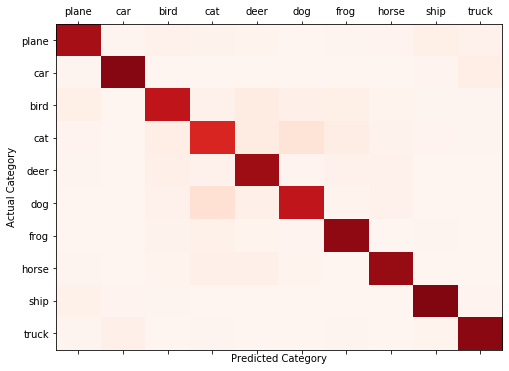

In [0]:
tperform.test_performance(model, testloader, device, classes)

***Show misclassified TEST images***
<hr>

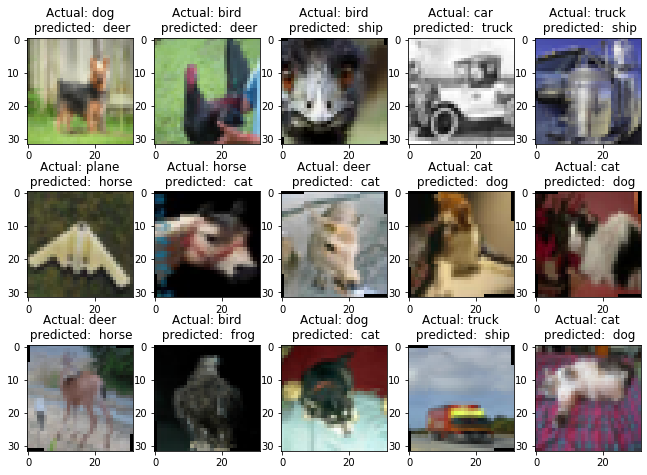

In [0]:
images, actuals, preds = misclassified.test_misclassified(model,device,testloader)
misclassified.plot_images(images, actuals, preds, classes)